<a href="https://colab.research.google.com/github/AbhhishekY/MiniProjects/blob/master/Q2_Reddit_news_sentimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
!pip install -q praw
import praw

In [ ]:

reddit = praw.Reddit(client_id='c3mm12nAfGRe0g',
                     client_secret='asV5h3q4gbeWlY6WwBRn4kH8pNE',
                     user_agent='AbhhisekYY')

In [ ]:
headlines = set()

for submission in reddit.subreddit('indianews').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

499


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[{'compound': 0.4404,
  'headline': 'DELHI HIGH COURT RULES IN FAVOUR OF BUDWEISER AFTER IT SUED THE SATIRICAL WEBSITE, '
              '“WWW.FAUXY.COM”',
  'neg': 0.0,
  'neu': 0.828,
  'pos': 0.172},
 {'compound': -0.8176,
  'headline': 'Woman Attacks Wife After Being Confronted On Making Obscene Gestures Towards '
              'Husband',
  'neg': 0.486,
  'neu': 0.514,
  'pos': 0.0},
 {'compound': -0.6808,
  'headline': 'Stick inserted into the private parts of a dog, another canine raped several times: '
              'Two recent incidents of bestiality in Maharashtra',
  'neg': 0.195,
  'neu': 0.805,
  'pos': 0.0}]


In [ ]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,0.828,0.172,0.4404,DELHI HIGH COURT RULES IN FAVOUR OF BUDWEISER ...
1,0.486,0.514,0.000,-0.8176,Woman Attacks Wife After Being Confronted On M...
2,0.195,0.805,0.000,-0.6808,Stick inserted into the private parts of a dog...
3,0.228,0.702,0.070,-0.7430,[Makarand Paranjape] It is this gap between pi...
4,0.086,0.859,0.055,-0.1546,Uber is hiring hundreds of engineers in India ...


In [ ]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,0.828,0.172,0.4404,DELHI HIGH COURT RULES IN FAVOUR OF BUDWEISER ...,1
1,0.486,0.514,0.000,-0.8176,Woman Attacks Wife After Being Confronted On M...,-1
2,0.195,0.805,0.000,-0.6808,Stick inserted into the private parts of a dog...,-1
3,0.228,0.702,0.070,-0.7430,[Makarand Paranjape] It is this gap between pi...,-1
4,0.086,0.859,0.055,-0.1546,Uber is hiring hundreds of engineers in India ...,0


In [ ]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [ ]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['DELHI HIGH COURT RULES IN FAVOUR OF BUDWEISER AFTER IT SUED THE SATIRICAL WEBSITE, “WWW.FAUXY.COM”',
 'BJP seat share in Ladakh council shrinks, Congress gains',
 '[TimesNow] Holy Quran absolutely forbids worshipping or praising any idol or God other than Allah: Anand Ranganathan | IndiavsHardliners',
 'WION wants advertisers to stop sponsoring channels that "spread hate", terminology of pseudoliberals/Congress for nationalist non-minoritycrime appeasing channels like Republic.',
 'The longer Modi remains a mute spectator, not lifting a finger against those tormenting #Arnab & @republic , the more he proves that his supporters & champions are mere disposable commodities. A '
 'general who doesn’t defend his soldiers is no general.']

Negative headlines:

['Woman Attacks Wife After Being Confronted On Making Obscene Gestures Towards Husband',
 'Stick inserted into the private parts of a dog, another canine raped several times: Two recent incidents of bestiality in

In [ ]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

-1    200
 0    181
 1    118
Name: label, dtype: int64
-1    40.080160
 0    36.272545
 1    23.647295
Name: label, dtype: float64


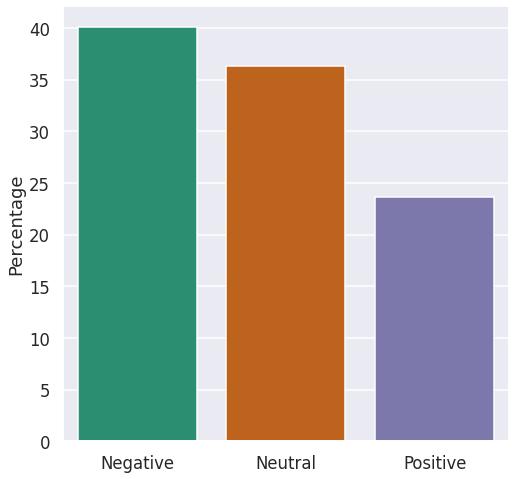

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()